In [14]:
#investigating relationships between dependent and independent variables using multiple linear regression model and correlation coefficients

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime

#import data, drop unnecessary columns
df = pd.read_excel('YouTube Analytics.xlsx', sheet_name='FY22')
#print(df.head())
df.drop(['Content', 'Video title', 'Video publish time'], axis=1, inplace=True)

       Content                                        Video title  \
0  RO43syy-9ao  A Beginner's Guide To Guitar Effects Pedals......   
1  AcjZAzWgdNc  Top 5 Best Cheap Electronic Drum Kits That Don...   
2  916xdgfyrv0  8 Best Guitar Starter Packs - Cheap Guitar & A...   
3  Wi6EIJB0oSw  How To Restring A Ukulele - Beginner's Guide T...   
4  7Z9JOFwC5yQ  How To Choose a Guitar Amplifier - Electric Gu...   

  Video publish time   views  watch time  subscribers   adsense  duration  \
0         2019-02-21  237682  35253.3726         1592  1452.339  00:08:54   
1         2019-12-03  297609  22109.8404          576  1304.432  00:04:27   
2         2020-11-19  153982  23899.3622          753   826.022  00:09:18   
3         2019-06-13  114862   5666.5651          312   633.416  00:02:57   
4         2018-11-01  118450  10856.0190          763   630.634  00:05:29   

   impressions  click rate  
0      5175877        2.79  
1      3371666        6.26  
2      2714737        3.77  
3     

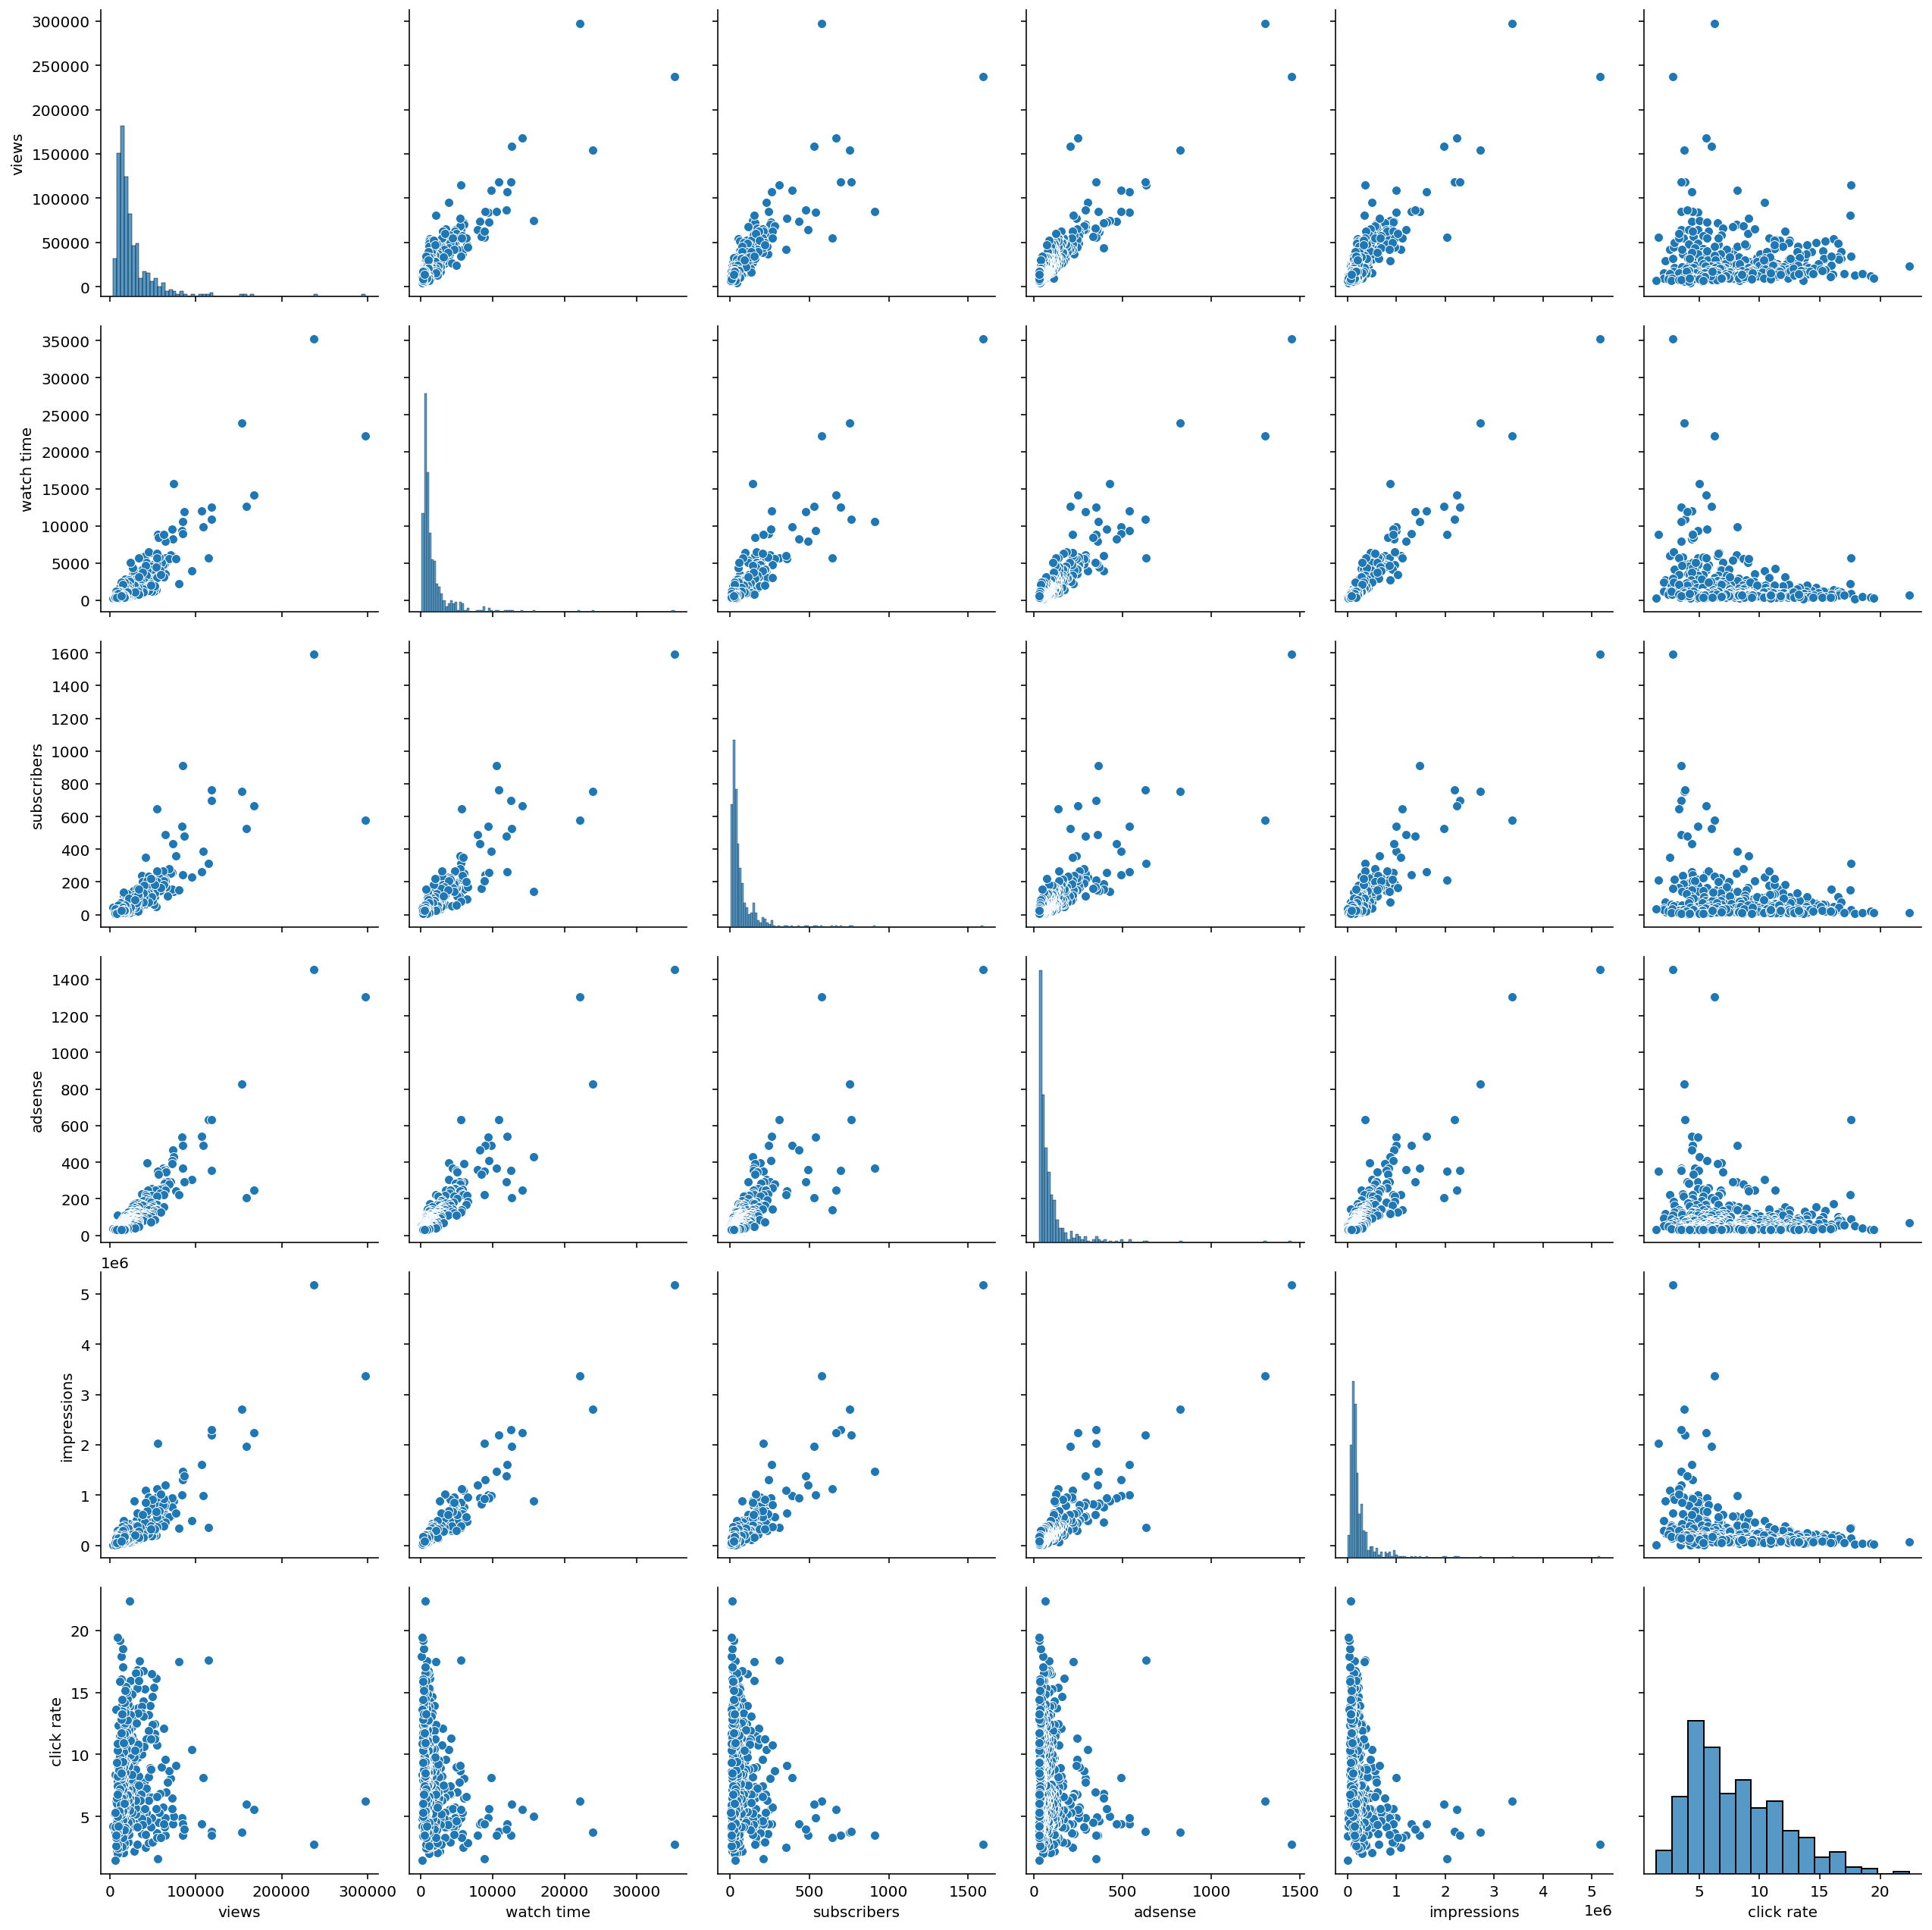

In [15]:
#pairplot to observe patterns in our dataset
sns.pairplot(data=df, height=3)
plt.show()

In [16]:
#Setting the value for X and Y
x = df[['impressions', 'views', 'watch time', 'click rate']]
y = df['adsense']

In [17]:
#Split dataset and fit model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [18]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  3.6760832543277076
Coefficients:


[('impressions', 6.270232621725271e-05),
 ('views', 0.001246544381519621),
 ('watch time', 0.020637492932953277),
 ('click rate', 0.4313662249336971)]

In [19]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 207.99035599  232.00458012   28.76212847   35.44275509  149.86974194
   71.7461427    40.12187388   78.48880882   98.24312466  106.90741479
   76.67800944  255.60717554  112.51623011   40.09329525   68.69852805
   45.29428176   25.62668529   69.65879589   81.38342574   18.4408198
   88.28828752   36.30138611  151.78080638   59.70897355   79.34364494
   63.18349869  135.07560807   42.32233429   64.65874737  207.71867133
  101.67351662   20.49558373   40.27210978   45.00640034  293.82961908
   39.79799361   37.44254481   94.13022784  258.50721417  367.19911854
   69.32136837   48.24954691   49.11171367   76.53815425   70.65427872
   59.07937531   45.37314173   43.82328111   38.16373297   56.31284017
   37.57576183   37.09186641   23.46471034   24.94596013  177.96672856
   60.922088     40.05728914  111.51087539   37.55421174   42.79936229
   59.44265751   45.25866774   67.55497414   81.3343361    39.46691527
   60.68738216   66.70397223   28.36899615   55.36782

In [20]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
69,144.341,207.990356
29,258.286,232.004580
471,33.002,28.762128
344,45.691,35.442755
54,174.805,149.869742


In [21]:
#Evaluating the model
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 87.02
Mean Absolute Error: 24.20378451369981
Mean Square Error: 3300.22424830281
Root Mean Square Error: 57.447578263167976


In [22]:
corr = df[['impressions', 'views', 'watch time', 'click rate', 'adsense']].corr()
print(corr)

             impressions     views  watch time  click rate   adsense
impressions     1.000000  0.878407    0.949459   -0.308921  0.881486
views           0.878407  1.000000    0.884695   -0.020612  0.904382
watch time      0.949459  0.884695    1.000000   -0.268936  0.915523
click rate     -0.308921 -0.020612   -0.268936    1.000000 -0.163251
adsense         0.881486  0.904382    0.915523   -0.163251  1.000000


Pearson correlation coefficient matrix for each independent variable: 
              impressions     views  watch time  click rate   adsense
impressions     1.000000  0.878407    0.949459   -0.308921  0.881486
views           0.878407  1.000000    0.884695   -0.020612  0.904382
watch time      0.949459  0.884695    1.000000   -0.268936  0.915523
click rate     -0.308921 -0.020612   -0.268936    1.000000 -0.163251
adsense         0.881486  0.904382    0.915523   -0.163251  1.000000


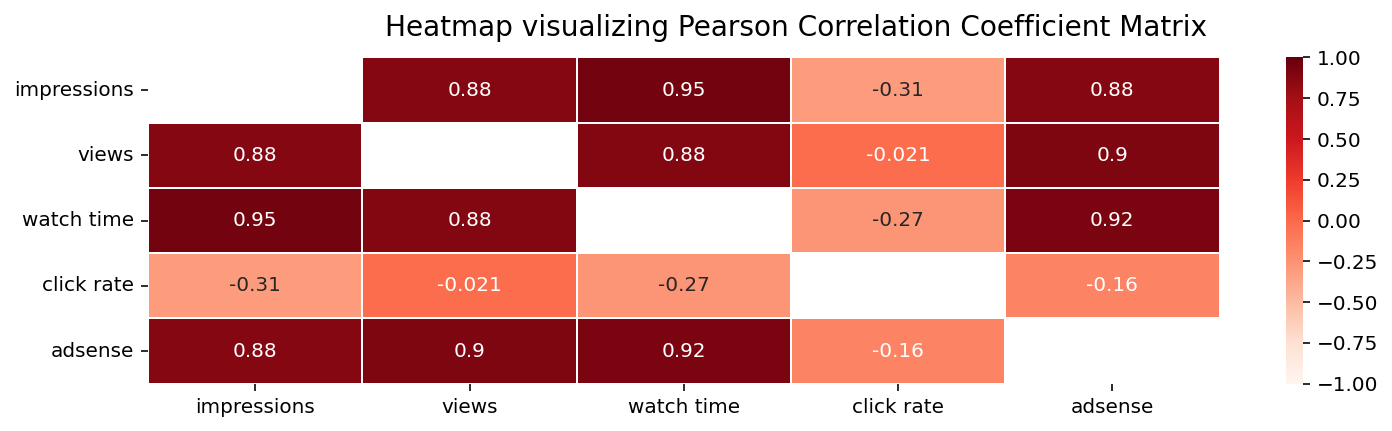

In [23]:
#Visualizing multicollinearity between independent features using a heatmap  
  
corr = df[['impressions', 'views', 'watch time', 'click rate', 'adsense']].corr()
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  
  
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = bool)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (12, 3))  
  
# Generating a custom colormap using reds
c_map = sns.color_palette("Reds", as_cmap=True)

# Displaying the heatmap with the masking and the correct aspect ratio
sns.heatmap(corr, mask=masking, cmap=c_map, vmin=-1, vmax=1, center=0, linewidths=1, annot=True)
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize=14)
axis.tick_params(axis='both', which='major', labelsize=10)